In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Importing Data

In [2]:
feat_file = '/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_features.csv'
features = pd.read_csv(feat_file)

In [6]:
features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [9]:
features.set_index('respondent_id')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,nan,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.00,0.00,NaN,NaN
26703,1.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.00,0.00,fcxhlnwr,cmhcxjea
26704,2.00,2.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.00,0.00,NaN,NaN


In [14]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.00,0.00,NaN,NaN
1,1,3.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.00,0.00,pxcmvdjn,xgwztkwe
2,2,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.00,0.00,rucpziij,xtkaffoo
3,3,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.00,0.00,NaN,NaN
4,4,2.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.00,0.00,wxleyezf,emcorrxb


<AxesSubplot:>

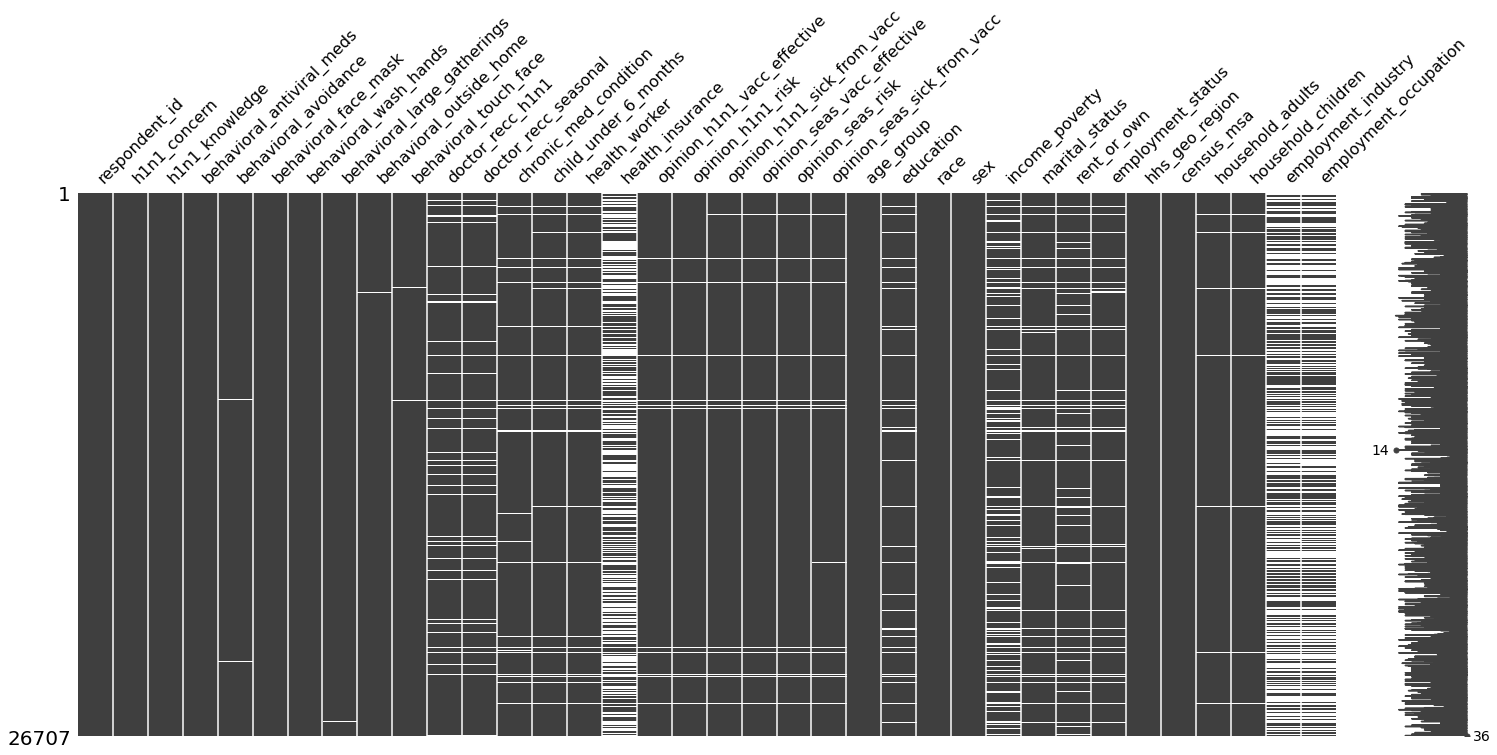

In [13]:
msno.matrix(features)

Drop unnecessary columns 

In [ ]:
df.drop(columns=['hhs_geo_region', ])